# Анализ компаний-единорогов

### Автор Андрей Самоленков

<img src="images/unicorn.jpg" alt="Unicorn image" style="width:600px;"/>

## Вступление

### Цель проекта:
Помочь инвестиционной фирме, на основе анализа данных, принять решение в какие компании ей нужно инвестировать. В данном случае рассматриваются исключительно **компании-единороги** - компании, оцененные в свыше миллиард долларов.

### Этот проект включает в себя:
Работу с датами, манипуляции со строками, структурирование данных по средством группировки в временные интервалы, визуализация данных.

### Используемые библиотеки:

NumPy, pandas, seaborn, matplotlib



## Шаг 1: Импортируем библиотеки 

In [95]:
# Импорт необходимых библиотек и модулей
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

### Загружаем датасет в датафрейм

In [67]:
df = pd.read_csv("Unicorn_Companies.csv")

## Шаг 2: Исследование данных


In [68]:
# Отображаем первые 10 строк датасета
df.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


### Определяем количество столбцов и строк

In [69]:
df.shape

(1074, 10)

### Проверяем датасет на наличие дупликатов

In [70]:
df.duplicated().sum()

0

### Отображаем типы данных нашего датасета

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


Столбец `Year Founded` имеет тип данных int64, вместо необходимого datetime


### Сортируем данные

In [72]:
# Сортируем компании по году основания и отображаем первые 10 строк
df.sort_values(by='Year Founded', ascending=True).head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
189,Otto Bock HealthCare,$4B,6/24/17,Health,Duderstadt,Germany,Europe,1919,$0M,EQT Partners
373,Promasidor Holdings,$2B,11/8/16,Consumer & retail,Bryanston,South Africa,Asia,1979,$556M,"IFC, Ajinomoto"
699,Five Star Business Finance,$1B,3/26/21,Other,Chennai,India,Asia,1984,$456M,"Sequoia Capital India, Tiger Global Management..."
840,Radius Payment Solutions,$1B,11/27/17,Fintech,Crewe,United Kingdom,Europe,1990,$200M,Inflexion Private Equity
11,Epic Games,$32B,10/26/18,Other,Cary,United States,North America,1991,$7B,"Tencent Holdings, KKR, Smash Ventures"
377,BGL Group,$2B,11/24/17,Fintech,Peterborough,United Kingdom,Europe,1992,$696M,CPP Investment Board
1043,Thirty Madison,$1B,6/2/21,Health,New York,United States,North America,1993,$210M,"Northzone Ventures, Maveron, Johnson & Johnson..."
129,Howden Group Holdings,$5B,9/29/20,Other,London,United Kingdom,Europe,1994,$187M,"General Atlantic, 3i Group, Huagai Capital"
118,Vice Media,$6B,4/2/11,Internet software & services,Brooklyn,United States,North America,1994,$1B,"Technology Crossover Ventures, A&E Television ..."
360,Carzone,$2B,3/1/19,E-commerce & direct-to-consumer,Jiangsu,China,Asia,1995,$946M,"Alibaba Group,Co-Stone Venture Capital, Buhuo ..."


>Сортируя компании по возрастанию по году их основания, мы видим, что все 10 компаний были основаны до 2000 года, причем самая ранняя компания была основана в 1919 году, а остальные - примерно в 80-х и 90-х годах. Однако все 10 компаний стали единорогами в период 2010-2021 гг. Это указывает на то, что эти компании прошли долгий период роста и развития, прежде чем достигли статуса «единорога».
>
>Из 10 компаний штаб-квартиры 3 находятся в Великобритании, а штаб-квартиры 3 — в США. Есть только две компании с финансированием более 1 миллиарда долларов: Vice Media и Epic Games.

### Определияем количество компаний, основанных в каждый год.

In [73]:
df.groupby('Year Founded')['Company'].count().sort_values(ascending=False).reset_index()

,Year Founded,Company
0,2015,155
1,2016,110
2,2014,109
3,2012,95
4,2013,87
5,2011,82
6,2017,74
7,2018,61
8,2019,45
9,2010,40


In [74]:
df['Year Founded'].value_counts().to_frame()

,count
Year Founded,
2015,155
2016,110
2014,109
2012,95
2013,87
2011,82
2017,74
2018,61
2019,45


> В 2015 году было зарегистрировано наибольшее количество основанных компаний, далее идут `2016` и `2014`. Это указывает на то, что в этот период было основано большое количество компаний.

Строим гистограмму признака `Year Founded`

C:\Users\andre\AppData\Local\Temp\ipykernel_16684\857023484.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x = 'Year Founded', palette='magma')


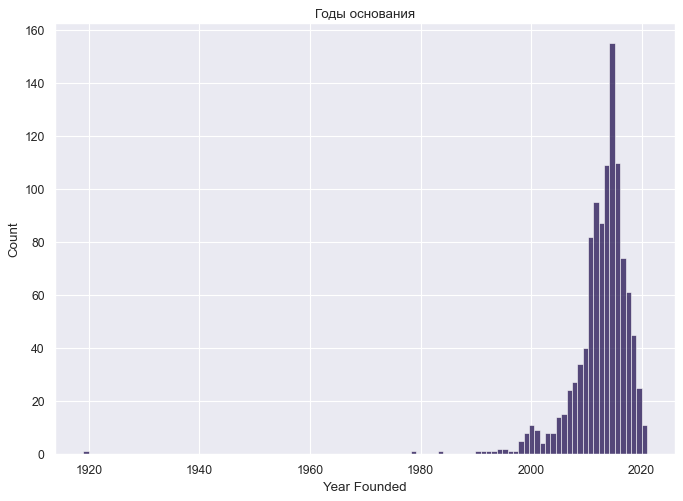

In [94]:
# Plot a histogram of the Year Founded feature.
plt.figure(figsize = (10,7), dpi=80)
sns.histplot(data=df, x = 'Year Founded', palette='magma')
plt.title('Годы основания')
plt.show()

### Конвертируем столбец `Date Joined` в тип данных datetime

Это позволит отдельно использовать дни, месяцы, года для более детального анализа.

In [76]:
# Конвертируем столбец `Date Joined` в тип данных datetime
df['Date Joined'] = pd.to_datetime(df['Date Joined'])


# Проверяем изменился ли тип данных
df.dtypes

C:\Users\andre\AppData\Local\Temp\ipykernel_16684\15400193.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Joined'] = pd.to_datetime(df['Date Joined'])


Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

### Создаем столбец `Month Joined`

Это позволит нам отдельно вывести названия месяцев, в которые компании стали "единорогами".

In [77]:
df["Month Joined"] = df["Date Joined"].dt.month_name().str[:3]

# Выводим 5 первых строк для проверки результата

df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",Apr
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Dec
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",Jul
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",Jan
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",Dec


### Создаем столбец `Years To Join`

Определяем сколько лет компаниям потребовалось на то, чтобы достичь статуса "единорога".

In [78]:
# Вычитаем год основания из года присоединения к списку единорогов и получаем кол-во лет, которое понадобилось компании на достижение статуса.

df['Year Joined'] = df['Date Joined'].dt.year

df['Years To Join'] = df['Year Joined'] - df['Year Founded']

# Проверяем результат

df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Year Joined,Years To Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",Apr,2017,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",Dec,2012,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",Jul,2018,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",Jan,2014,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",Dec,2011,6


> Я хочу получить больше информации о 2022 году, поскольку это последний год, по которому имеются данные. Тенденции, которые имели место в 2022 году, могут быть аналогичны тенденциям, которые будут иметь место в 2023 году в отношении роста промышленности и континента.

### Больше информации по конкретном году

In [79]:
# Фильтруем датасет по конкретному году и сохраняем в переменную

df_2022 = df[df['Year Joined'] == 2022]


# Отображаем результат

df_2022.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Year Joined,Years To Join
18,Miro,$18B,2022-01-05,Internet software & services,San Francisco,United States,North America,2011,$476M,"Accel, AltaIR Capital, Technology Crossover Ve...",Jan,2022,11
117,RELEX Solutions,$6B,2022-02-17,"Supply chain, logistics, & delivery",Helsinki,Finland,Europe,2005,$803M,"Blackstone, Technology Crossover Ventures, Sum...",Feb,2022,17
163,Qonto,$5B,2022-01-11,Fintech,Paris,France,Europe,2016,$704M,"Alven Capital, Valar Ventures, Tencent Holdings",Jan,2022,6
210,Globalization Partners,$4B,2022-01-24,Internet software & services,Boston,United States,North America,2012,$350M,"Vista Equity Partners, Wincove, TDR Capital",Jan,2022,10
220,Hozon Auto,$4B,2022-02-22,Auto & transportation,Shanghai,China,Asia,2014,$2B,"HD Capital, Qihoo 360 Technology, China Fortun...",Feb,2022,8


> Есть несколько способов наблюдать тенденции в компаниях, ставших единорогами за один год, используя временной интервал:
>
> - Распределение компаний по отраслям
> - Распределение компаний по странам
> - Количество компаний, ставших единорогами с течением времени
> - Средняя оценка компаний, ставших единорогами
> - Количество присоединившихся компаний за неделю/месяц

### Отслеживаем тенденции с течением времени

In [80]:
# Создаем столбец с номерами недель за 2022 год и группируем по этому столбцу чтобы определить сколько компаний стали единорогами в каждую конкретную неделю

df_2022['Week Of 2022'] = df_2022['Date Joined'].dt.strftime('W%V')

df_2022_by_week = df_2022.groupby('Week Of 2022')['Company'].count().reset_index().rename(columns={"Company":"Company Count"})

# отображаем результат

df_2022_by_week


C:\Users\andre\AppData\Local\Temp\ipykernel_16684\3772425659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Week Of 2022'] = df_2022['Date Joined'].dt.strftime('W%V')


,Week Of 2022,Company Count
0,W01,5
1,W02,17
2,W03,4
3,W04,15
4,W05,7
5,W06,10
6,W07,12
7,W08,14
8,W09,2
9,W10,6


### Сравниваем тенденции с течением времени


In [81]:
# Фильтруем по дополнительным годам чтобы создать поднабор, состоящий из компаний ставших единорогами в те года
df_2020_2021 = df[df['Year Joined'].isin([2020, 2021])]

# Соединяем новы поднабор с поднабором данных за 2022 год
df_2020_to_2022 = pd.concat([df_2020_2021, df_2022.drop(columns="Week Of 2022")], ignore_index = True )

# Добавляет столбец с времеными интервалами в формате "год-квартал"
df_2020_to_2022['Quarter Joined'] = df_2020_to_2022['Date Joined'].dt.to_period('Q').dt.strftime('%Y-Q%q')

# Трансформируем столбец `Valuation`, оставив только числовые значения
df_2020_to_2022['Valuation'] = df_2020_to_2022['Valuation'].str.strip("$B").astype(float)

# Группируем по временым интервалам, вычисляем средние значения 
avg_valuation20202022 = df_2020_to_2022.groupby('Quarter Joined')['Valuation'].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})

# отображаем результат
avg_valuation20202022.head()

,Quarter Joined,Average Valuation
0,2020-Q1,3.444444
1,2020-Q2,3.777778
2,2020-Q3,3.896552
3,2020-Q4,3.697674
4,2021-Q1,2.750000


## Шаг 3: Статистические тесты

### Создаем визуализацию времени, ушедшего на переход компаний в категорию "единорогов"

In [82]:
# Создаем список месяцев в правильном порядке
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Выводим список
month_order

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

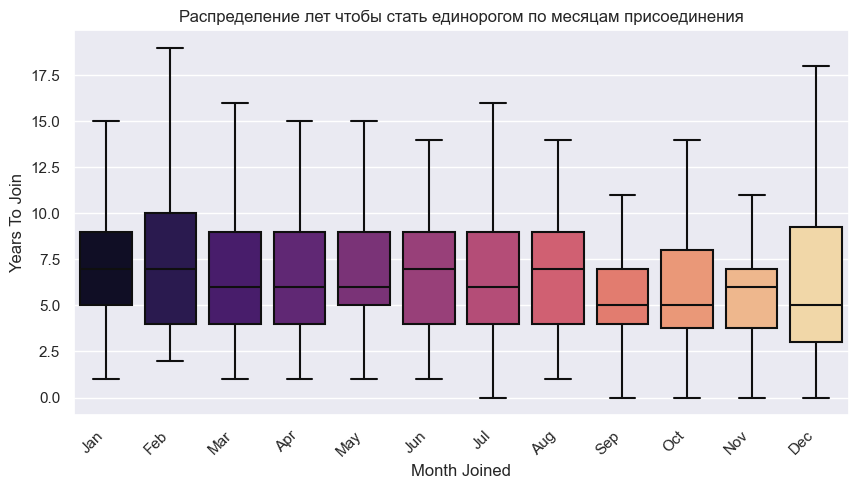

In [93]:
# Создаем ящичковую диаграмму, чтобы визуализировать распределение времени, которое потребовалось компаниям, чтобы стать единорогами, по отношению к месяцу, в котором они присоединились.
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x = 'Month Joined', y = 'Years To Join', showfliers = False, order = month_order, palette='magma')

# Задаем заголовок диаграммы.
plt.title('Распределение лет чтобы стать единорогом по месяцам присоединения')

# Повернем метки по оси x, чтобы избежать наложения позиций текста. 
plt.xticks(rotation=45, ha='right')

# Отображаем диаграмму
plt.show()

> На предыдущей ящичковой диаграмме медианное значение столбца `Years To Join` отличается для каждого месяца. Кроме того, медианное значение `Years To Join` ниже для сентября, октября и декабря. Это может свидетельствовать о том, что компаниям, достигшим статуса «единорога» в конце года, потребовалось меньше времени, чтобы достичь оценки в $1 млрд.

## Шаг 4: Результаты и оценка


### Визуализируем время, которое потребовалось компаниям, чтобы достичь статуса единорога

C:\Users\andre\AppData\Local\Temp\ipykernel_16684\3855298848.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df, x ='Year Founded', y='Years To Join', ci = False, palette='magma')


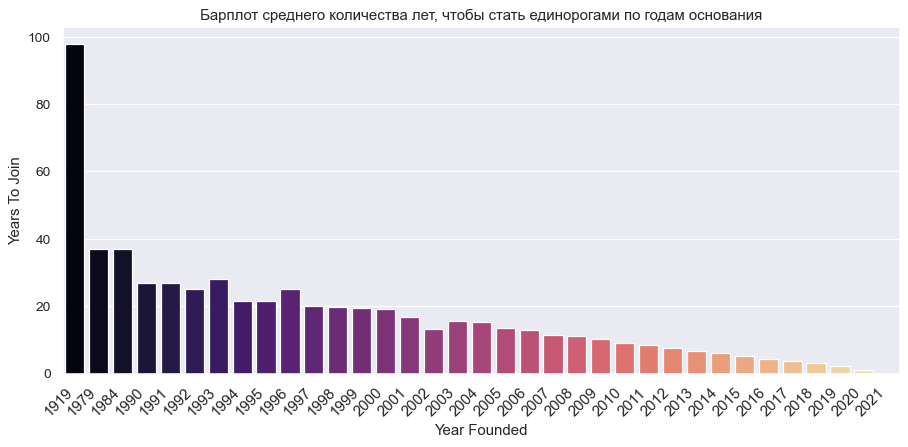

In [92]:
# Устанавливаем размер диаграммы
plt.figure(figsize=(12,5), dpi=90)

# Строим барплот для визуализации среднего количества лет, которое потребовалось компаниям, чтобы достичь статуса единорога 
# по отношению к моменту их основания. 
sns.barplot(data=df, x ='Year Founded', y='Years To Join', ci = False, palette='magma')

# Задаем заголовок диаграммы.
plt.title("Барплот среднего количества лет, чтобы стать единорогами по годам основания")

# Повернем метки по оси x, чтобы избежать наложения позиций текста. 
plt.xticks(rotation=45, ha='right', fontsize='12')

# Отображаем диаграмму
plt.show();

> Компаниям, которые были основаны позже, в среднем потребовалось меньше времени, чтобы достичь статуса единорога. 
> Для тех, кто был основан после 2010 года, потребовалось около 5-10 лет, чтобы достичь статуса единорога.

### Визуализируем количество компаний, присоединившихся за каждый конкретный интервал

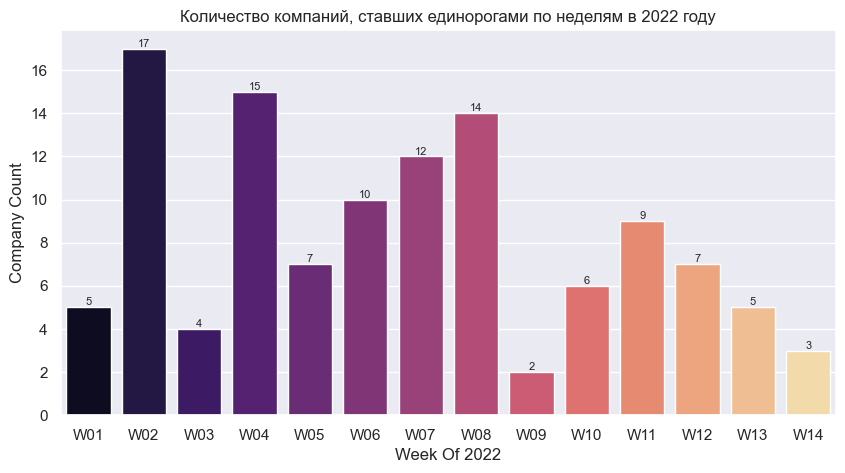

In [91]:
# Устанавливаем размер диаграммы
plt.figure(figsize = (10, 5), dpi=100)

# Строим юарплот для визуализации количества компаний, присоединившихся за конкртеный интервал за интересующий нас год.
sns.barplot(data=df_2022_by_week, x ='Week Of 2022', y = 'Company Count', palette='magma')

# Задаем заголовок диаграммы.
plt.title("Количество компаний, ставших единорогами по неделям в 2022 году")

for index, row in df_2022_by_week.iterrows():
    plt.annotate(row['Company Count'], xy=(index, row['Company Count']), ha='center', va='bottom', fontsize = 8);

> Количество компаний, присоединившихся за один интервал, распределяется неравномерно в течение года. Есть недели, когда количество компаний, которые присодинились, намного выше, чем в другие недели. 
> 
> Наибольшее количество компаний, достигших оценки в 1 миллиард долларов, произошло на 2-й неделе (W02) 2022 года - 17. Это говорит о том, что именно на этой неделе значительное количество компаний достигло статуса единорога.

### Визуализируем среднюю оценку за кварталы

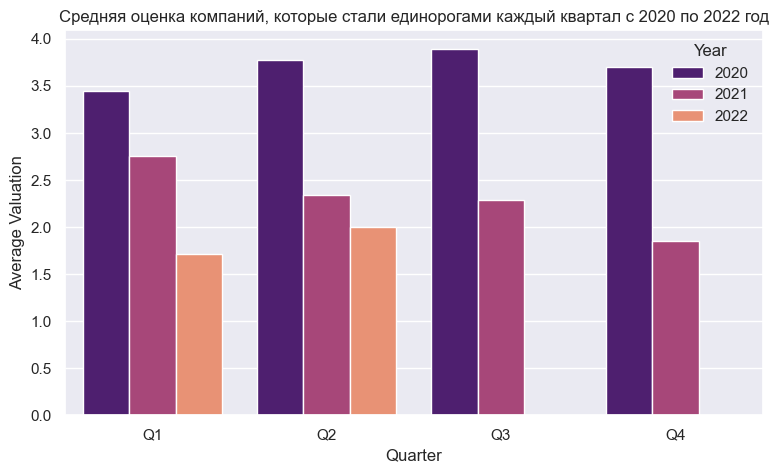

In [90]:
# Используя слайсинг, извлекаем компонент года и интервал времени, который мы указали, 
# и сохраним их, добавив два новых столбца в подмножество.

avg_valuation20202022['Quarter'] = avg_valuation20202022['Quarter Joined'].str[-2:]
avg_valuation20202022['Year'] = avg_valuation20202022['Quarter Joined'].str[:4]

# Задаем размер диаграммы
plt.figure(figsize = (9, 5), dpi=100)

# Строим сдвоиный барплот
sns.barplot(data = avg_valuation20202022, x = 'Quarter', y = 'Average Valuation', hue = 'Year', palette='magma')

# Задаем заголовок
plt.title("Средняя оценка компаний, которые стали единорогами каждый квартал с 2020 по 2022 год");

> С 2020 года по 2 квартал 2022 года наблюдается тенденция к снижению количества компаний, ставших единорогами. 
>
> Наибольшее количество компаний, ставших единорогами, наблюдалось в третьем квартале 2020 года со средней оценкой около 4 миллиардов, а затем начало падать с 4 квартала 2020 года по 4 квартал 2021 года с примерно 3,7 миллиарда до чуть менее 2 миллиардов в 4 квартале 2021 года. 
> 
> Средняя оценка в 1-м квартале 2022 года осталась такой же, как и в 4-м квартале 2021 года, и составила менее 2 миллиардов. 
> 
> Тем не менее, во 2 квартале 2022 года наблюдалась небольшая тенденция к росту средней оценки единорогов, при этом средняя оценка увеличилась до более чем 2 миллиардов.

<blockquote> 
    
**Потенциальная систематическая ошибка**: 
- Географическая предвзятость: Если данные включают только определенные города или страны, анализ может быть нерепрезентативным для глобального ландшафта единорогов. Он может отражать тенденции и характеристики включенных регионов, а не охватывать более широкую картину. 

- Отраслевая предвзятость: если набор данных фокусируется на определенных отраслях или исключает другие, анализ может не отражать тенденции и закономерности во всем спектре отраслей. Это может привести к искажениям в понимании общей динамики компаний-единорогов. 

- Смещение по времени: Если в данных есть пробелы или если набор данных охватывает более короткий период времени, это может ограничить анализ и обеспечить искаженную перспективу. Наблюдаемые тенденции и закономерности могут быть более применимы к имеющемуся временному интервалу и могут не отражать долгосрочные тенденции или изменения.

- Систематическая ошибка выбора: Набор данных может включать только определенные типы компаний-единорогов на основе определенных критериев или источников данных. Это может привести к предвзятому представлению об общем ландшафте единорогов, исключая определенные типы компаний или отдавая предпочтение определенным характеристикам. 

- Систематическая ошибка выжившего: Набор данных может включать только те компании, которые успешно достигли статуса единорога, за исключением тех, которые потерпели неудачу или упали ниже порога оценки. Это может исказить анализ, не учитывая проблемы и неудачи, с которыми сталкивается значительная часть стартапов. 

- Систематическая ошибка доступности данных: набор данных может быть ограничен общедоступными или легкодоступными источниками данных. Это может привести к отсутствию данных по определенным компаниям или регионам, что приведет к неполному пониманию ландшафта единорогов.
</blockquote>

## Выводы

**На основе проведенного анализа какой информацией можно было бы поделиться с инвестиционной компанией?**

- В этом датасете представлено 1074 компаний-единорогов. 
- 2015 год – это год, когда было основано наибольшее количество компаний-единорогов. 
- Построенная ящичковая диаграмма показывает, что компании, которые стали единорогами в сентябре, октябре и декабре, имеют меньшее медианное значение времени, которое потребовалось для того, чтобы стать единорогами. 
- Одна из построенных диаграмм показывает, что средняя оценка компаний, присоединившихся в 2020 году, самая высокая в третьем квартале года, в то время как средняя оценка компаний, присоединившихся в 2021 и 2022 годах, снизилась.

**Спасибо за внимание!**